<a href="https://colab.research.google.com/github/zac-alex/AML-64061/blob/main/AML_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the required packages from numpy,keras & Tensor flow

In [4]:
#importing required packages

import numpy as np
from keras.utils import to_categorical
from keras import models
from keras import layers
from tensorflow.keras.optimizers import Adam
from keras.datasets import imdb
import tensorflow as tf



Loading the dataset with maximum word limit of 10,000

In [5]:
# Loading the dataset

(train_data, train_labels), (test_data, test_labels)= imdb.load_data(num_words=10000)


One-hot encoding

In [6]:
# Preparing the data

def vectorize(sequences, dimension = 10000):
 results = np.zeros((len(sequences), dimension))
 for i, sequence in enumerate(sequences):
  results[i, sequence] = 1
 return results

Vectorizing the test,train data & labels

In [7]:
# Vectorizing the data

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Vectorized training data

x_train = vectorize(train_data)

# Vectorized test data

x_test = vectorize(test_data)



Model building using tanh, relu with 64 nodes,3 hidden layers **without dropout**

In [8]:
# Model building for 2 epochs

model = models.Sequential()
# Input - Layer
model.add(layers.Dense(64, activation = "tanh", input_shape=(10000, )))
# Hidden - Layers
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(64, activation = "relu"))
# Output- Layer
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640064    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 652,609
Trainable params: 652,609
Non-trainable params: 0
_________________________________________________________________


Compiling the model [ optimizer -rmsprop ] 

In [9]:
# Model compiling 

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Setting a part of training data as validation data

In [10]:
# Creating validation Set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Running the model in validation data with 10 epochs

In [11]:
# Running model in Validation Set

history = model.fit(
partial_x_train, partial_y_train,
 epochs= 10,
 batch_size = 512,
 validation_data = (x_val, y_val))


Epoch 1/10
30/30 [==============================] - 6s 138ms/step - loss: 0.5324 - accuracy: 0.7249 - val_loss: 0.3379 - val_accuracy: 0.8661
Epoch 2/10
30/30 [==============================] - 2s 75ms/step - loss: 0.2995 - accuracy: 0.8781 - val_loss: 0.2815 - val_accuracy: 0.8850
Epoch 3/10
30/30 [==============================] - 2s 78ms/step - loss: 0.2170 - accuracy: 0.9169 - val_loss: 0.3766 - val_accuracy: 0.8497
Epoch 4/10
30/30 [==============================] - 2s 73ms/step - loss: 0.1752 - accuracy: 0.9309 - val_loss: 0.3362 - val_accuracy: 0.8649
Epoch 5/10
30/30 [==============================] - 6s 213ms/step - loss: 0.1440 - accuracy: 0.9441 - val_loss: 0.3290 - val_accuracy: 0.8752
Epoch 6/10
30/30 [==============================] - 3s 102ms/step - loss: 0.1097 - accuracy: 0.9585 - val_loss: 0.3386 - val_accuracy: 0.8788
Epoch 7/10
30/30 [==============================] - 2s 75ms/step - loss: 0.0889 - accuracy: 0.9681 - val_loss: 0.4492 - val_accuracy: 0.8645
Epoch 8/10

In [12]:
#Creating a History Object

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting Training and Validation Loss to find optimal number of epochs

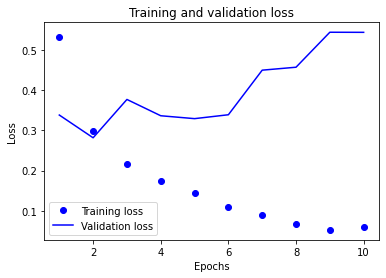

In [13]:
# Plotting Training and Validation Loss

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Optimal number of epochs=2 ,Training validation loss increases as epoch goes above 2 due to over-fitting.

Re-building the model with drop-out

In [14]:
# Model building for test set

model = models.Sequential()
# Input - Layer
model.add(layers.Dense(64, activation = "tanh", input_shape=(10000, )))
# Hidden - Layers
model.add(layers.Dropout(0.1, noise_shape=None, seed=None))
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dropout(0.1, noise_shape=None, seed=None))
model.add(layers.Dense(64, activation = "relu"))
# Output- Layer
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                640064    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 648,449
Trainable params: 648,449
Non-tr

Compiling the model with hyper-parameters learning rate-0.0001

In [15]:
# Model compiling & setting hyperparameters

learning_rate = 0.0001
optimizer = Adam(lr=learning_rate)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

Running the model in training set by setting epochs =2 to prevent over-fitting.

In [16]:
# Running model with 2 epochs 

results = model.fit(
 x_train, y_train,
 epochs= 2,
 batch_size = 512,
 validation_data = (x_val,y_val))



Epoch 1/2
49/49 [==============================] - 10s 153ms/step - loss: 0.3980 - accuracy: 0.8256 - val_loss: 0.1996 - val_accuracy: 0.9291
Epoch 2/2
49/49 [==============================] - 3s 69ms/step - loss: 0.1927 - accuracy: 0.9299 - val_loss: 0.1250 - val_accuracy: 0.9652


Running the model in test set


In [17]:
results = model.fit(
 x_train, y_train,
 epochs= 2,
 batch_size = 512,
 validation_data = (x_test,y_test))

Epoch 1/2
49/49 [==============================] - 7s 134ms/step - loss: 0.1375 - accuracy: 0.9522 - val_loss: 0.3443 - val_accuracy: 0.8709
Epoch 2/2
49/49 [==============================] - 4s 79ms/step - loss: 0.1005 - accuracy: 0.9653 - val_loss: 0.4017 - val_accuracy: 0.8674
